<center><h1 style="font-size: 28px;"><b>Bloc 3 : Analyse prédictive de données structurées par l'intelligence artificielle</b></h1></center>

<h2 style="font-size: 20px;">Utilisation d'un algorithme d'apprentissage automatique non-supervisé pour segmenter une base de données (K-Means)</h2>

***Objectifs de l'algorithme :***

Dans le genre "ALCES" présent sur le site iNaturalist, les Elans ne sont classés que par leur nom scientifique "ALCES", hors il existe trois catégorie d'Elans : Les Elans de l'est, les Elans de l'Ouest et pour finir les Elan Yukon.
Dans les données présentent dans notre dataset nous n'avons pas de champs pour les différencier. Nous allons tenter de le faire par le biais de l'algorithme KMEANS en utilisant les coordonnées géographique.

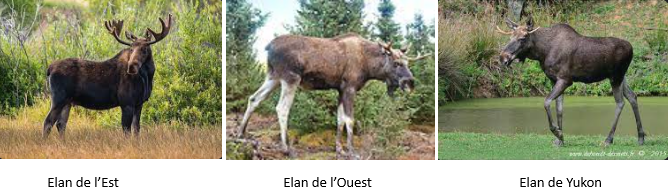

## 1. Imports des bibliothèques python


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
import plotly.express as px

## 2. Prétraitement, exploration, transformation et visualisation des données

Données extaites du site iNaturalist.org : https://www.inaturalist.org/pages/developers - http://www.inaturalist.org/observations/gbif-observations-dwca.zip

<u>a) Pré-traitement des données dans KNIME</u>

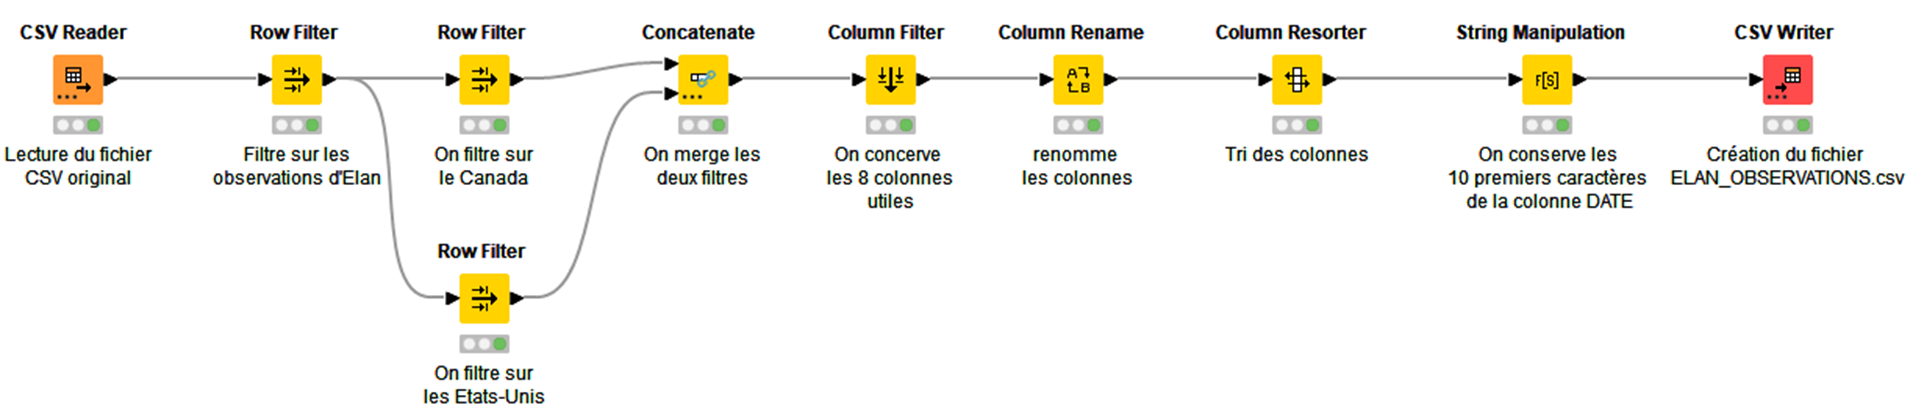

In [ ]:
#Import du fichier généré via KNIME
data = pd.read_csv('ELAN_OBSERVATIONS.csv')

In [ ]:
# Visualisation du dataset :
data

,id,Date,Taxon,Latitude,Longitude,stateProvince,scientificName
0,120609387,2022-06-06,522193,57.182062,-111.405323,Alberta,Alces alces
1,120612908,2022-06-06,522193,44.355201,-76.078020,Ontario,Alces alces
2,120614734,2020-10-01,522193,53.679080,-112.825853,Alberta,Alces alces
3,140720175,2022-10-31,522193,51.103251,-114.496485,Alberta,Alces alces
4,80420033,2021-05-24,522193,48.024882,-89.561867,Ontario,Alces alces
...,...,...,...,...,...,...,...
13475,20055577,2015-06-18,522193,43.790428,-110.681763,Wyoming,Alces alces
13476,20055578,2015-06-18,522193,43.790428,-110.681763,Wyoming,Alces alces
13477,20056117,2016-06-17,522193,42.858733,-109.848717,Wyoming,Alces alces
13478,20073868,2018-09-29,522193,61.086293,-149.648019,Alaska,Alces alces


<u>b) Transformation des données</u>

In [ ]:
# Suppression des colonnes inutiles
data.drop('id', axis=1, inplace=True)
data.drop('Taxon', axis=1, inplace=True)
data.drop('Date', axis=1, inplace=True)
data.drop('stateProvince', axis=1, inplace=True)
data.drop('scientificName', axis=1, inplace=True)

In [ ]:
# Traitement des valeurs manquantes : On ne garde que les lignes ou les coordonnées sont présentes
data.dropna(inplace=True)

<u>c) Exploration des données</u>

In [ ]:
# Affichage des première lignes du dataset transformé et nettoyé
data.head(10)

,Latitude,Longitude
0,57.182062,-111.405323
1,44.355201,-76.078020
2,53.679080,-112.825853
3,51.103251,-114.496485
4,48.024882,-89.561867
5,44.863986,-76.763028
6,50.825525,-115.207097
7,50.878979,-114.716649
8,53.841744,-122.691667
9,50.993828,-100.331885


In [ ]:
# Descritpion statistique du dataset
data.describe()

,Latitude,Longitude
count,13480.000000,13480.000000
mean,48.367738,-104.498277
std,7.131638,25.855390
min,35.309050,-166.207008
25%,43.684835,-115.898321
50%,45.967344,-107.259890
75%,51.165482,-78.808226
max,70.080297,-52.679097


In [ ]:
# Affichage des informations sur notre dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13480 entries, 0 to 13479
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   13480 non-null  float64
 1   Longitude  13480 non-null  float64
dtypes: float64(2)
memory usage: 210.8 KB


<u>d) Visualisation des données</u>

In [ ]:
# VIsualisation des données avec la création d'une carte en utilisant Plotly Express
fig = px.scatter_geo(data,
                     lat='Latitude',
                     lon='Longitude',
                     title='Latitude - longitude des observations, 4 espèces confondues')

fig.show()

## 3. Construction du modèle K-Means

Initialisation du modèle.
Nous recherchons trois clusters, pour "Elan de l'Est" et "Elan de l'Ouest" et "Elan de Yukon"

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=200)

## 4. Entrainement du modèle

In [ ]:
kmeans.fit(data)

KMeans(n_clusters=3, n_init=200, random_state=42)

## 5. Evaluation du modèle


<u>a) Calcul de l'inertie</u>

L'inertie est une mesure de la somme des carrés des distances entre chaque point de données et le centre du cluster auquel il appartient.

L'inertie mesure à quel point les données sont regroupées autour de leurs centres de clusters respectifs. Une inertie plus faible indique généralement que les points sont plus proches de leur centre de cluster, ce qui est souhaitable car cela signifie que les clusters sont plus compacts.

In [ ]:
inertia = kmeans.inertia_
inertia

823952.53114727



Ici, une inertie de 823952 signifie que les points du jeu de données sont relativement proches de leurs centres de clusters respectifs, ce qui suggère que K-Means a trouvé des clusters bien définis dans les données.

Ce résultat est donc satisfaisant

<u>b) Calcul de silhouette_avg</u>

Le score de silhouette est une mesure de la qualité de la séparation entre les clusters obtenue par l'algorithme K-Means.

Il varie de -1 à 1, où :
- Une valeur proche de 1 indique que les clusters sont bien séparés et que chaque point est plus proche des points de son propre cluster que des autres clusters.
- Une valeur proche de 0 indique que les clusters se chevauchent.
- Une valeur proche de -1 indique que les points sont incorrectement attribués à des clusters.

In [ ]:
silhouette_avg = silhouette_score(data, kmeans.labels_)
silhouette_avg

0.7268512217426158

Ici, un score de silhouette de 0.727 est assez élevé, ce qui suggère une assez bonne séparation entre les clusters. Cela signifie que les points à l'intérieur d'un cluster sont similaires les uns aux autres et diffèrent des points des autres clusters.

Ce résultat est également satisfaisant, l'algorithme des KMEANS a bien identifié séparer 3 groupes distincts.

## 6. Visualisation des clusters trouvés

<u>a) Coordonées des points trouvés pour les clusters :</u>

In [ ]:
kmeans.cluster_centers_

array([[  45.48200567, -111.08977576],
       [  45.94931412,  -75.4719856 ],
       [  61.83883296, -147.18995472]])

Par acquis de conscience, nous regardons le tableau des résultats obtenus. On a bien 3 groupes distincts : les 0, 1 et 2

In [ ]:
result_array = kmeans.labels_
result_array

array([0, 1, 0, ..., 0, 2, 0], dtype=int32)

<u>b) Représentation graphique de la données et des clusters obtenus :</u>

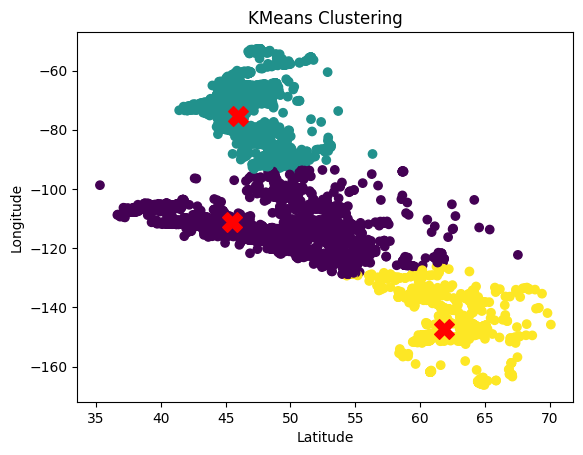

In [ ]:
plt.scatter(data["Latitude"], data["Longitude"], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=200)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KMeans Clustering')
plt.show()



Les 3 groupes sont bien distincts, même si l'on peut observer un certain "chavauchement" entre deux clusters qui sont les Eland de l'Est (Jaune) et les Elan de l'Ouest (Violet)

<u>c) Visualisation des différents cluster obtenus sur la carte d'origine:</u>

Création d'un fichier CSV avec les classifications K-MEANS obtenus

In [ ]:
data_csv = pd.read_csv('ELAN_OBSERVATIONS.csv')
data_csv.dropna(inplace=True)
data_csv["KMEANS_classification"] = result_array


In [ ]:
def map_kmeans_classification(value):
    if value == 0:
        return "Elan de l'Ouest"
    elif value == 1:
        return "Elan de l'Est"
    elif value == 2:
        return "Elan de Yukon"


# Appliquer la fonction pour créer la nouvelle colonne
data_csv["Categorisation_KMeans"] = data_csv["KMEANS_classification"].apply(map_kmeans_classification)

In [ ]:
# Créez une carte en utilisant Plotly Express
fig = px.scatter_geo(data_csv,
                     lat='Latitude',
                     lon='Longitude',
                     color='Categorisation_KMeans',
                     title='Carte des points en fonction de la classification KMEANS')

fig.show()

In [ ]:
data_csv.to_csv("Elan_post_KMEANS.csv", index=False)

## 6. Vérification du nombre K de clusters (retrouver k=3 par la méthode du dite du "coude")

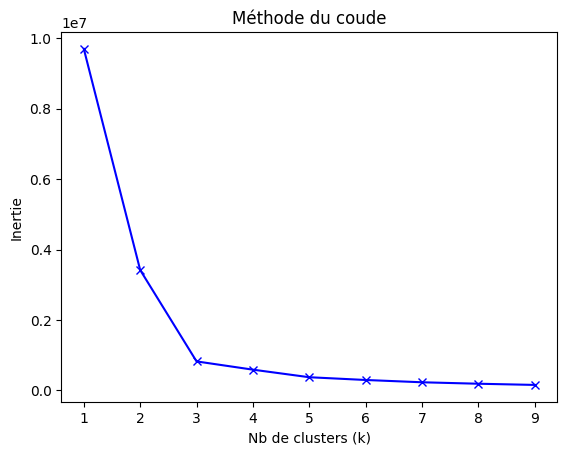

In [ ]:
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=200, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Nb de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

Le coude est bien visible à k=3. Cela confirme la séparation "principale" des observations du genre "ALCES" en 3 groupes distincts.

## 7. Vérification de la bonne classification selon les observations


In [ ]:
df_verif = pd.read_csv('ELAN_OBSERVATIONS.csv')
df_verif.dropna(inplace=True)
df_verif["KMEANS_classification"] = result_array

In [ ]:
df_verif

,id,Date,Taxon,Latitude,Longitude,stateProvince,scientificName,KMEANS_classification
0,120609387,2022-06-06,522193,57.182062,-111.405323,Alberta,Alces alces,0
1,120612908,2022-06-06,522193,44.355201,-76.078020,Ontario,Alces alces,1
2,120614734,2020-10-01,522193,53.679080,-112.825853,Alberta,Alces alces,0
3,140720175,2022-10-31,522193,51.103251,-114.496485,Alberta,Alces alces,0
4,80420033,2021-05-24,522193,48.024882,-89.561867,Ontario,Alces alces,1
...,...,...,...,...,...,...,...,...
13475,20055577,2015-06-18,522193,43.790428,-110.681763,Wyoming,Alces alces,0
13476,20055578,2015-06-18,522193,43.790428,-110.681763,Wyoming,Alces alces,0
13477,20056117,2016-06-17,522193,42.858733,-109.848717,Wyoming,Alces alces,0
13478,20073868,2018-09-29,522193,61.086293,-149.648019,Alaska,Alces alces,2


En regardant manuellement les sous-espèces du genre "ALCES" obtenues dans l'extraction de iNaturalist puis KNIME, on peut reconstituer les 3 groupes d'une autre façon.
Comparons cela au résultat obtenu par KMEANS.

Prendre une carte des états unis et montré les bonne classification et leur logique peut-être par rapport à la carte ci-dessous